# 2.1 - BoseEinsteinCondensate tutorial: comoving frame and defect tracking

Here we are going to show how the BoseEinsteinCondensate can be evolved in the comoving frame. We start by initialising a BoseEinsteinCondensate with a gaussian potential a bit forward in the computational domain. The ground state of this configuration is found by initialising the Thomas-Fermi ground state and evolving this in imaginary time.  

A constant (in time) potential is implemented in the code as the function bec.V_ext(t). The  default a function given as self.V_ext = lambda t: 0. This can be changed by using the function bec.conf_external_potential(V_ext, additive=False) 

We provide two functions that calculates some commonly used potentials. The gaussian and the harmonic potential. They are given by the functions:

bec.calc_gaussian_stirring_potential(size, strength, position) and
bec.calc_harmonic_potential(R_tf)

where R_tf is the Thomas-Fermi radius (the size of the condensate, see documentation for details). 

In [ ]:
!pip install comfit -q

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

bec = cf.BoseEinsteinCondensate(2,xRes=256,yRes=128,gamma=0,dt=0.05)

### task 1: Set the potiential to a constant gaussian at this position [bec.xmid+50,bec.ymid] with size = 5 and
# strength = 4
#Set the potential by defininf V0 = ...
# and calling the function bec.conf_external_potential(V0)




We now need to initialise the wave function. A convinient starting point is the ground state of the system with the given potential. Since we don't have any analytic expression for this state we find it by starting out from a guess and remove energy by evolving in imaginary time (see previous notebook and documentation). The first guess is usualy the Thomas-Fermi ground state which is implemented as the function:

bec.conf_initial_condition_Thomas_Fermi()


In [ ]:
### task 2: Initialise the wavefunction using the Thomas-Fermi ground state and relax the system in imaginary time 
# for 50 time steps. Plot the absolut value squared of the wave function
#(Hint: the evolvers vere discussed in the previous notebook)


bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

Now we sett bec.gamma to be zero inside the computational domain and 1 on the edges. This can be done with the function bec.conf_dissipative_frame(d=7, wx=50, wy=50, wz=50). Here wx/wy/wz is the distance from the midle to the start of the dissipative frame in the x/y/z direction. In two dimensions wz is not used. d is the size of the interface between the bulk and the dissipative frame. 



In [ ]:
#### task 3. make a dissipative frame with d=7, wx = 100 and wy = 50. plot bec.gamma




Now we want to evolve the system in the comoving frame and we want to use the function bec.calc_vortex_nodes() to find the vortices.

In [ ]:
### task 4. evolve the system in the comoving frame with vel_x = 0.4. Make an animation of the absolut value squared 
# of the wavefunction and mark the position of the defects.   






In [ ]:
### We can now plot the vortices you traced 

ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'gray')
bec.plot_vortex_nodes(nodes,ax)
plt.show()

# Solutions

Relaxing the BoseEinsteinCondensate...


evolving the dGPE: 100%|███████████████████████| 50/50 [00:00<00:00, 687.02it/s]


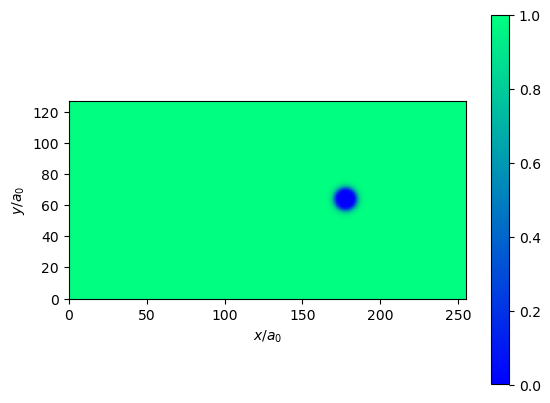

In [14]:

import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

bec = cf.BoseEinsteinCondensate(2,xRes=256,yRes=128,gamma=0,dt=0.05)

### task 1 and 2


pot = bec.calc_gaussian_stirring_potential(5, 4, [bec.xmid+50,bec.ymid] )
bec.conf_external_potential(pot, additive=False)

bec.conf_initial_condition_Thomas_Fermi()

bec.evolve_relax(50, method='ETD2RK') 

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

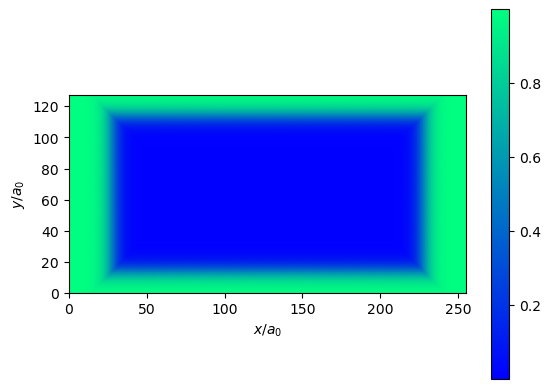

In [15]:
# task 3
bec.conf_dissipative_frame(wx=100,wy=50)

bec.plot_field(bec.gamma,cmap_symmetric=False,colormap = 'winter')
plt.show()

evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 135.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 172.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 133.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 137.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 173.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 136.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 171.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 170.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 170.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 130.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 176.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 170.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 138.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 120.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 131.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 135.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 125.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 131.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 107.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 136.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 128.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 131.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 137.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 137.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 136.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 173.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 129.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 138.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 136.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 133.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 135.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 171.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 176.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 136.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 170.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 172.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.71it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 170.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 138.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 174.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 173.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 173.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 171.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 170.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 135.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 136.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 173.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 141.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.99it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 124.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 137.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 137.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 134.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 136.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 133.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 121.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 130.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 134.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.40it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.00it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 138.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.62it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 170.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.27it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 138.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.01it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.28it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.92it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.87it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 172.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 137.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.24it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 143.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.68it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.63it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.77it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.43it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 178.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 137.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 134.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.34it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 177.10it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.08it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 122.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.16it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.56it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.37it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.93it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.31it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.12it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.18it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.83it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.41it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.84it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 133.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.65it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.80it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.98it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.35it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 171.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.42it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.67it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.51it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.70it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.15it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.38it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 142.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.32it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.07it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.90it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.81it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.11it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 165.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.79it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.86it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.39it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.55it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.13it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 147.88it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.14it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.94it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.58it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.03it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.73it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.46it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.25it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 169.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.09it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.57it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 139.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.04it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.50it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 163.95it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.53it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.74it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.26it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.33it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 140.52it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.54it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.85it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 156.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 167.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.69it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.17it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.19it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.05it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.76it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.21it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.91it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 161.06it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.61it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.64it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 164.47it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 145.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.97it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 168.78it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 149.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 150.96it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 153.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 159.22it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 166.36it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.60it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.72it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.20it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.44it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 162.30it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 160.66it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 154.48it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 157.82it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 148.75it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 152.45it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.29it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 158.59it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 138.23it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 146.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.49it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 155.02it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 144.89it/s]


(256, 128)
(256, 128)
(256, 128)


evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 151.86it/s]


(256, 128)
(256, 128)
(256, 128)


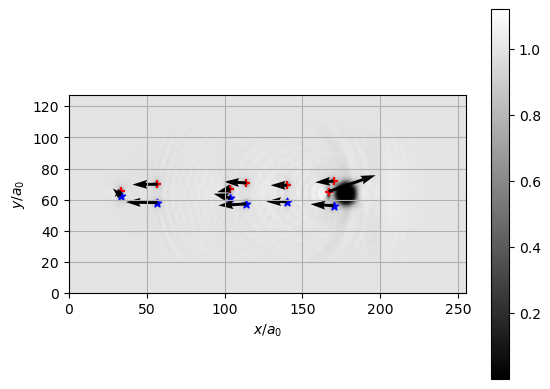

In [16]:
#task 4
vel_x = 0.40



N= 2000

for n in range(N):
    psi_prev = np.copy(bec.psi)
    
    bec.evolve_comoving_dGPE(10,vel_x,method='ETD4RK')
    
    dt_psi = (bec.psi - psi_prev)/(bec.dt*10)
    nodes = bec.calc_vortex_nodes(dt_psi=dt_psi)

    fig,ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'gray')
    
    bec.plot_vortex_nodes(nodes,ax)
    cf.tool_save_plot(n)

cf.tool_make_animation_gif(n)
